In [1]:
from data_analysis_codes import param
import matplotlib.pyplot as plt
import matplotlib
#from data_analysis_codes.tools import Cstyle
#plt.style.use(Cstyle.style1)
from matplotlib import gridspec
from data_analysis_codes.tools import LinData
import numpy as np
import h5py
from data_analysis_codes.tools import ReadingTools as RRead
from skimage import measure
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sim = param.pflrw_d3e2_L1821_t1_N128_LCDM()
param = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')
Lin = LinData.LinData_Class(param)

 read time file


In [3]:
it = 0
it_file_name = param['h5datapath']+sim.sim_name
f = h5py.File('{}_it_{:06d}.hdf5'.format(it_file_name, it), 'r')
rho = RRead.cut0(RRead.fixij(f['CT_DUST::rho it={} tl=0 rl={}'.format(it, sim.refinement_level)]), sim.nbr_ghost, param['Nx'])
deltafirst = rho/Lin.rho(Lin.temp_from_temp('t', 'it', it)) - 1

In [4]:
def plotformat():
    ticks = [-sim.lambda_pert/2, -sim.lambda_pert/4, 0, sim.lambda_pert/4, sim.lambda_pert/2]
    tickm = [-0.5, -0.25, 0.0, 0.25, 0.5]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    ax.set_xticklabels(tickm)
    ax.set_yticklabels(tickm)
    ax.set_zticklabels(tickm)
    ax.set_xlabel(r'$x \;\; [\lambda_{pert}]$')
    ax.set_ylabel(r'$y \;\; [\lambda_{pert}]$')
    ax.set_zlabel(r'$z \;\; [\lambda_{pert}]$')
    ax.view_init(30,30)

<IPython.core.display.Javascript object>


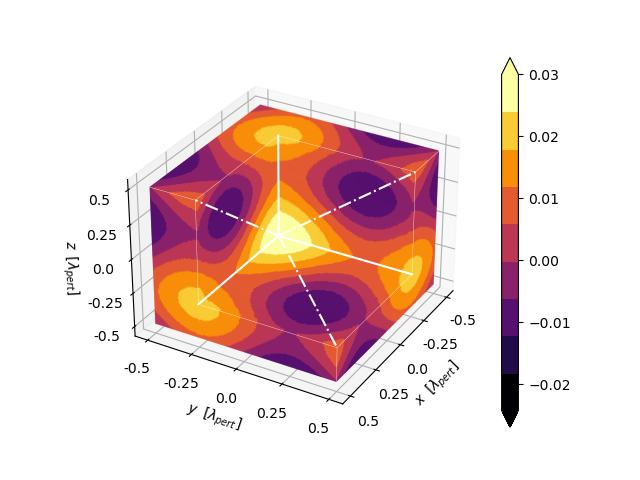

<ipython-input-7-4e7c62d6915b>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [7]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 1) 
ax = fig.add_subplot(gs[0], projection='3d')
mask = ~ np.logical_and(np.logical_and(Lin.d3x>-sim.lambda_pert/4, Lin.d3y>-sim.lambda_pert/4), Lin.d3z>-sim.lambda_pert/4)
scatter = ax.scatter(Lin.d3x[mask], Lin.d3y[mask], Lin.d3z[mask], c=deltafirst[mask], s=1, cmap=matplotlib.cm.get_cmap('inferno', 9), zorder=1)
fig.colorbar(scatter, extend='both')
A = -sim.lambda_pert/4
B = sim.lambda_pert/2
ax.plot([A, A], [A, B], [A, A], 'w', zorder=3)
ax.plot([A, A], [A, A], [A, B], 'w', zorder=3)
ax.plot([A, B], [A, A], [A, A], 'w', zorder=3)
ax.plot([A, B], [A, B], [A, A], 'w-.', zorder=3)
ax.plot([A, A], [A, B], [A, B], 'w-.', zorder=3)
ax.plot([A, B], [A, A], [A, B], 'w-.', zorder=3)
ax.plot([B,A,A,A,B,B,B], [A,A,B,B,B,A,A], [B,B,B,A,A,A,B], 'w', zorder=3, linewidth=0.25)
ax.plot([B,B], [-B,A], [B,B], 'w', zorder=3, linewidth=0.25)
ax.plot([-B,A], [B,B], [B,B], 'w', zorder=3, linewidth=0.25)
ax.plot([B,B], [B,B], [-B,A], 'w', zorder=3, linewidth=0.25)

plotformat()
#plt.title(r'$\delta,\;\;a/a_{IN}=1$')
plt.tight_layout()
#plt.subplots_adjust(left=-0.3, right=0.9, top=0.9, bottom=0.1)
#plt.savefig('/home/robynm/simulations/pflrw_d3e2_L1821_t1_N128_LCDM/plots/Initial_3d_delta.png', dpi=1200)

<IPython.core.display.Javascript object>


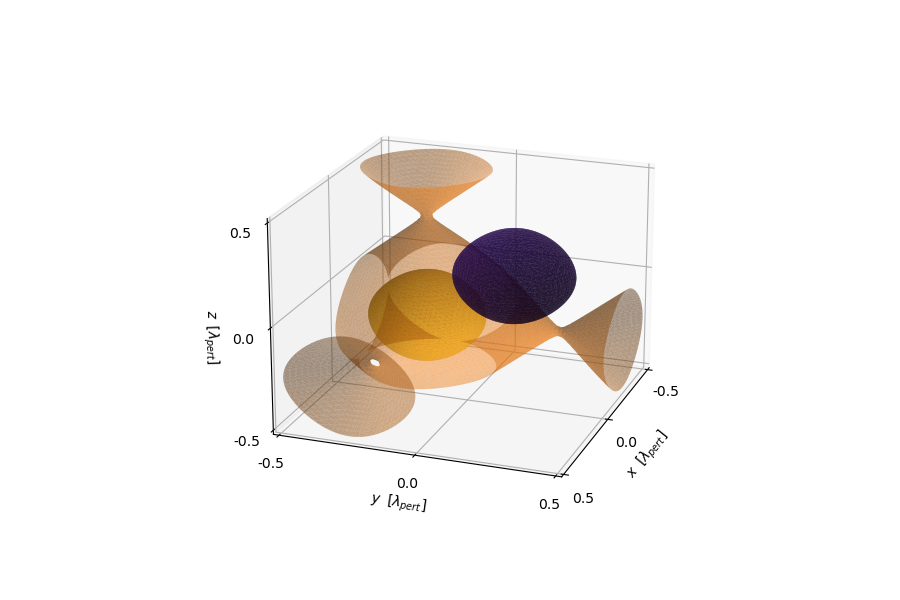

<ipython-input-30-dc7cf10d83b8>:15: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[isoval_integer])
<ipython-input-30-dc7cf10d83b8>:20: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[isoval_integer])
<ipython-input-30-dc7cf10d83b8>:25: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[isoval_integer])


In [30]:
data = deltafirst

cmap = matplotlib.cm.get_cmap('inferno')
nbr_plots = 300
isovals = np.linspace(np.min(data)*0.99, np.max(data)*0.99, nbr_plots)[::-1]
m = matplotlib.cm.ScalarMappable(cmap=cmap)
m.set_array(isovals)

fig = plt.figure(figsize=(9, 6))
gs = gridspec.GridSpec(1, 1) 
ax = fig.add_subplot(gs[0], projection='3d')

opacity = 0.5
isoval_integer = int(0.28*nbr_plots)
verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[isoval_integer])
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], linewidth=0, edgecolor=None, alpha=opacity, antialiased=True, color=cmap(1-isoval_integer/nbr_plots))

opacity = 1
isoval_integer = int(0.1*nbr_plots)
verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[isoval_integer])
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], linewidth=0, edgecolor=None, alpha=opacity, antialiased=True, color=cmap(1-isoval_integer/nbr_plots))

opacity = 0.75
isoval_integer = int(0.85*nbr_plots)
verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[isoval_integer])
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], linewidth=0, edgecolor=None, alpha=opacity, antialiased=True, color=cmap(1-isoval_integer/nbr_plots))

ax.set_xlim(0, Lin.N-1)
ax.set_ylim(0, Lin.N-1)
ax.set_zlim(0, Lin.N-1)
ticks = [0, (Lin.N-1)/2, (Lin.N-1)]
tickm = [-0.5, 0.0, 0.5]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.set_xticklabels(tickm)
ax.set_yticklabels(tickm)
ax.set_zticklabels(tickm)
ax.set_xlabel(r'$x \;\; [\lambda_{pert}]$')
ax.set_ylabel(r'$y \;\; [\lambda_{pert}]$')
ax.set_zlabel(r'$z \;\; [\lambda_{pert}]$')
ax.view_init(20,20)
#plt.title(r'$\mathcal{R}_c=$'+'{:.2f}'.format(isovals[int(0.28*nbr_plots)]))

<IPython.core.display.Javascript object>


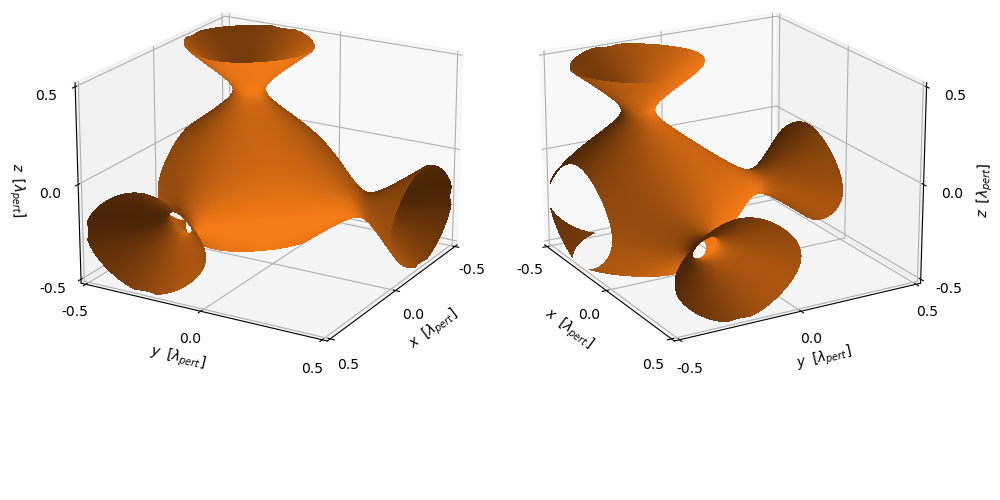

<ipython-input-5-e76d8f15f1fa>:13: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[isoval_integer])


In [5]:
data = deltafirst

cmap = matplotlib.cm.get_cmap('inferno')
nbr_plots = 300
isovals = np.linspace(np.min(data)*0.99, np.max(data)*0.99, nbr_plots)[::-1]
m = matplotlib.cm.ScalarMappable(cmap=cmap)
m.set_array(isovals)

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2) 

isoval_integer = int(0.29*nbr_plots)
verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[isoval_integer])
c = cmap(1-isoval_integer/nbr_plots)

ax = fig.add_subplot(gs[0], projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], 
                alpha=1, antialiased=False, linewidth=0, edgecolor=c, color=c)
ax.set_xlim(0, param['Nx']-1)
ax.set_ylim(0, param['Nx']-1)
ax.set_zlim(0, param['Nx']-1)
ticks = [0, (param['Nx']-1)/2, (param['Nx']-1)]
tickm = [-0.5, 0.0, 0.5]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.set_xticklabels(tickm)
ax.set_yticklabels(tickm)
ax.set_zticklabels(tickm)
ax.set_xlabel(r'$x \;\; [\lambda_{pert}]$')
ax.set_ylabel(r'$y \;\; [\lambda_{pert}]$')
ax.set_zlabel(r'$z \;\; [\lambda_{pert}]$')
ax.view_init(20,30)

ax = fig.add_subplot(gs[1], projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], 
                alpha=1, antialiased=False, 
                linewidth=0, edgecolor=c, color=c)
ax.set_xlim(0, param['Nx']-1)
ax.set_ylim(0, param['Nx']-1)
ax.set_zlim(0, param['Nx']-1)
ticks = [0, (param['Nx']-1)/2, (param['Nx']-1)]
tickm = [-0.5, 0.0, 0.5]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.set_xticklabels(tickm)
ax.set_yticklabels(tickm)
ax.set_zticklabels(tickm)
ax.set_xlabel(r'$x \;\; [\lambda_{pert}]$')
ax.set_ylabel(r'$y \;\; [\lambda_{pert}]$')
ax.set_zlabel(r'$z \;\; [\lambda_{pert}]$')
ax.view_init(20,-30)

#plt.tight_layout()
plt.subplots_adjust(left = 0.05, 
                    top = 1.2, 
                    wspace = 0.05,
                    right = 0.94)
#plt.title(r'$\mathcal{R}_c=$'+'{:.2f}'.format(isovals[int(0.28*nbr_plots)]))
plt.savefig('/home/robynm/simulations/pflrw_d3e2_L1821_t1_N128_LCDM/plots/Initial_3d_delta_0d01_isocurve.png')